##### Umut Deveci - 070180025

### Libraries

In [17]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
df = pd.read_csv("BankChurners.csv",index_col = "CLIENTNUM")

### Preprocessing of Data

In [19]:
attrition_mapper = {"Attrited Customer":0,"Existing Customer":1}
income_mapper = {"Unknown":0,"Less than $40K":1,"$40K - $60K":2,"$60K - $80K":3,"$80K - $120K":4,"$120K +":5}
education_mapper = {"Unknown":0,"Uneducated":1,"High School":2,"College":3,"Graduate":4,"Post-Graduate":5,"Doctorate":6}
card_mapper = {"Blue":0,"Silver":1,"Gold":2,"Platinum":3}
df["Attrition_Flag"]=df["Attrition_Flag"].replace(attrition_mapper)
df["Income_Category"]=df["Income_Category"].replace(income_mapper)
df["Education_Level"]=df["Education_Level"].replace(education_mapper)
df["Card_Category"]=df["Card_Category"].replace(card_mapper)

In [20]:
dummies = pd.get_dummies(df[["Gender","Marital_Status"]]).drop(["Gender_M","Marital_Status_Unknown"],axis=1)
df1 = pd.concat([df,dummies],axis = 1,join = "inner")
df1.drop(["Gender","Marital_Status"],axis =1,inplace = True)
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(df1)
df_scaled =pd.DataFrame(data_scaled, columns = df1.columns)
df_scaled.set_index(df1.index,inplace = True)

### Trial of K values

In [21]:
k_values = list(range(2,11))
inertia_values = []
silhouette_values = []
for k in k_values:
    km = KMeans(n_clusters = k,n_init = 5, init = "k-means++")
    km.fit(df_scaled)
    inertia_values.append(km.inertia_)
    sil_score = silhouette_score(df_scaled, km.labels_)
    silhouette_values.append(sil_score)

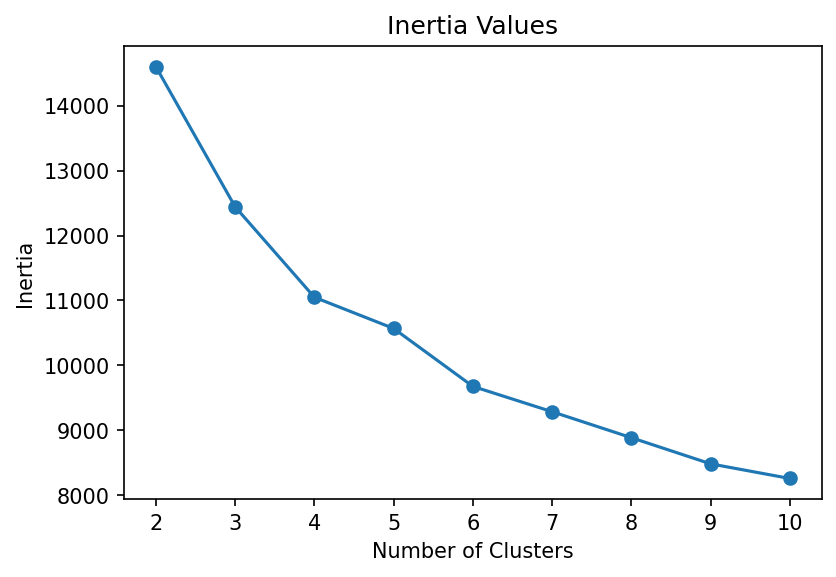

In [22]:
plt.figure(dpi = 150)
plt.plot(k_values, inertia_values, "-o")

plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Inertia Values")
plt.show()

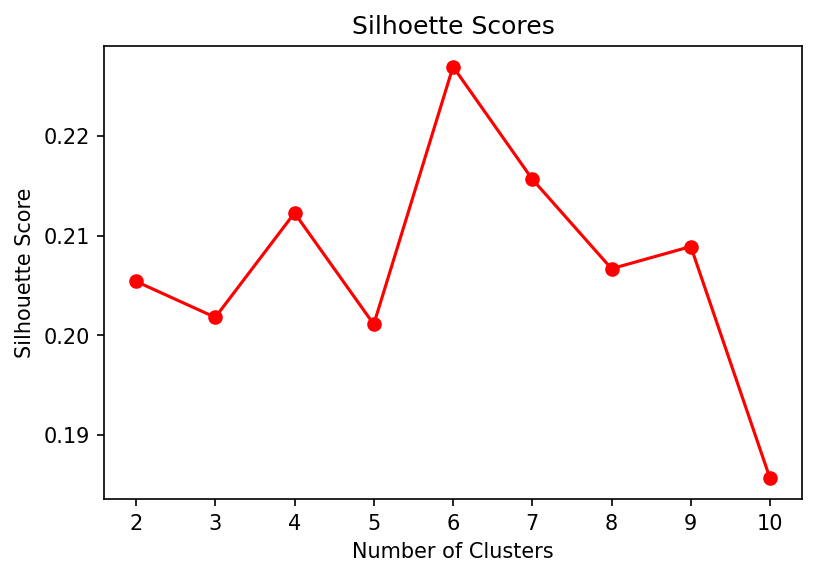

In [23]:
plt.figure(dpi = 150)
plt.plot(k_values, silhouette_values, "-ro")

plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhoette Scores")
plt.show()

For a healthy clustering analysis, a high silhouette score and a low inertia value is desired. As we keep increasing the number of clusters, we can observe that our inertia values decrease. However we can also observe that our silhouette scores decrease as well. Therefore, we pick the elbow point in our inertia graph which is also the point where we have our highest silhouette score. That point is k = 6.

### Final Clustering

In [24]:
km = KMeans(n_clusters = 6, n_init = 5, init = "k-means++")
km.fit(df_scaled)

KMeans(n_clusters=5, n_init=5)

In [25]:
df_centers = pd.DataFrame(km.cluster_centers_, columns = df_scaled.columns)
df_centers

,Attrition_Flag,Customer_Age,Dependent_count,Education_Level,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,...,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_F,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single
0,0.820706,0.428155,0.457224,0.424235,0.198024,0.024941,0.528350,0.553318,0.394353,0.409255,...,0.119013,0.219163,0.220267,0.453658,0.191130,0.332651,1.000000e+00,-1.526557e-16,-2.275957e-15,1.000000e+00
1,0.831905,0.446618,0.468707,0.443152,0.198776,0.013600,0.545055,0.567442,0.389433,0.397933,...,0.101350,0.224889,0.200213,0.416024,0.192892,0.354351,1.000000e+00,-1.526557e-16,1.000000e+00,2.442491e-15
2,0.867174,0.435200,0.478265,0.432245,0.672361,0.031157,0.534166,0.569052,0.388342,0.422257,...,0.306550,0.230050,0.207769,0.384473,0.192508,0.219335,-3.885781e-15,4.163336e-17,1.000000e+00,1.665335e-16
3,0.843257,0.431292,0.456387,0.432485,0.664224,0.048176,0.536399,0.554606,0.388889,0.412553,...,0.380662,0.221245,0.236684,0.439754,0.190829,0.174881,-6.661338e-16,-1.526557e-16,-3.552714e-15,9.251908e-01
4,0.830370,0.410749,0.492889,0.435309,0.376148,0.023457,0.513196,0.568741,0.390000,0.403210,...,0.189629,0.221808,0.226355,0.443796,0.190865,0.279379,5.792593e-01,5.540741e-01,-3.719247e-15,-7.216450e-16


### Identifying Loyal and Disloyal Clusters

In [26]:
loyal_cluster = df_centers.loc[df_centers["Attrition_Flag"]==df_centers["Attrition_Flag"].max()]
disloyal_cluster = df_centers.loc[df_centers["Attrition_Flag"]==df_centers["Attrition_Flag"].min()]

In [27]:
disloyal_cluster

,Attrition_Flag,Customer_Age,Dependent_count,Education_Level,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,...,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_F,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single
0,0.820706,0.428155,0.457224,0.424235,0.198024,0.024941,0.52835,0.553318,0.394353,0.409255,...,0.119013,0.219163,0.220267,0.453658,0.19113,0.332651,1.0,-1.526557e-16,-2.275957e-15,1.0


In [28]:
loyal_cluster

,Attrition_Flag,Customer_Age,Dependent_count,Education_Level,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,...,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_F,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single
2,0.867174,0.4352,0.478265,0.432245,0.672361,0.031157,0.534166,0.569052,0.388342,0.422257,...,0.30655,0.23005,0.207769,0.384473,0.192508,0.219335,-3.885781e-15,4.163336e-17,1.0,1.665335e-16


### Commentary on the Results

As we can see from our loyal and disloyal clusters, most significant factor to a customer's loyalty to the bank is their gender. Female customers tend to be more loyal then male customers. Most disloyal customers has an income level of $40K-$60k. Number of products held by the customer is inversly proportional with loyalty. We can also observe that disloyalty increases with the number of inactive months as well as number of communications. Even though there is not a significant difference between other clusters, we can observe a noticably low total transfer amount and total transfer count on the disloyal customers' cluster. We observe the highest average utilization ratio on the loyal customers' cluster. Remaining variables, such as marital status doesn't seem to have a significant relationship with the loyalty of a customer. 